In [1]:
import numpy as np
from numpy.random import randn

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# snsからデータをロード
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

### データの概要
- total_bill: 支払った総額
- tip: チップとして渡した金額
- sex: 性別
- smoker: 喫煙者かどうか
- day: 曜日
- time: 来店した時間帯
- size: 人数

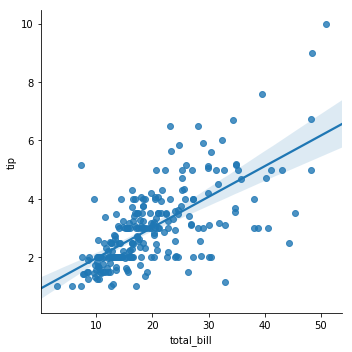

In [6]:
sns.lmplot('total_bill', 'tip', tips)

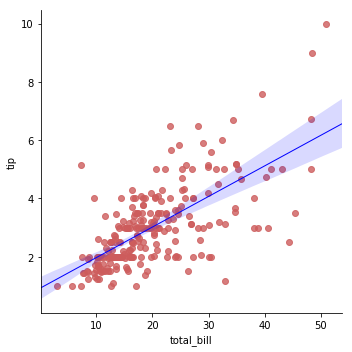

In [7]:
sns.lmplot('total_bill', 'tip', tips, 
                  scatter_kws={'marker': 'o', 'color': 'indianred'},
                  line_kws={'linewidth': 1, 'color': 'blue'})

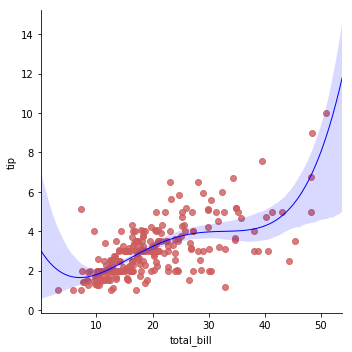

In [9]:
# 4次関数
sns.lmplot('total_bill', 'tip', tips, order=4,
                  scatter_kws={'marker': 'o', 'color': 'indianred'},
                  line_kws={'linewidth': 1, 'color': 'blue'})

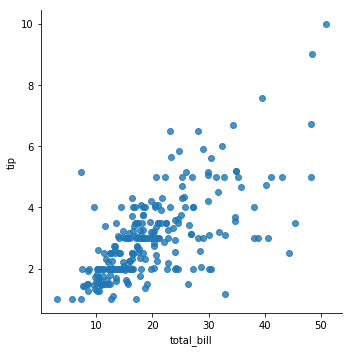

In [10]:
# 回帰直線を書かない
sns.lmplot('total_bill', 'tip', tips, fit_reg=False)

In [11]:
# tipsにtip_pect列を追加
tips['tip_pect'] = 100*(tips['tip'] / tips['total_bill'])

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


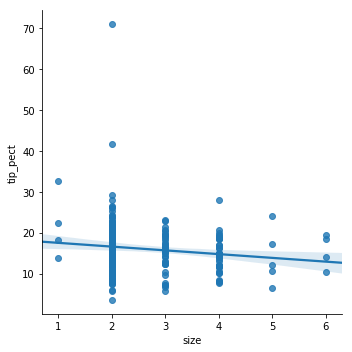

In [13]:
sns.lmplot('size', 'tip_pect', tips)

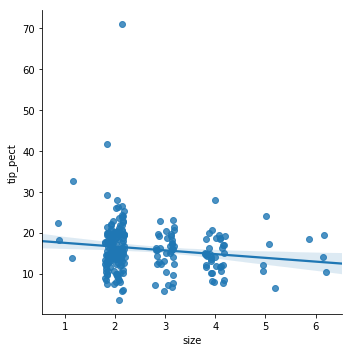

In [16]:
# データの揺らぎを表示
sns.lmplot('size', 'tip_pect', tips, x_jitter=0.2)

In [18]:
tips.groupby('size').mean()

,total_bill,tip,tip_pect
size,,,
1,7.242500,1.437500,21.729202
2,16.448013,2.582308,16.571919
3,23.277632,3.393158,15.215685
4,28.613514,4.135405,14.594901
5,30.068000,4.028000,14.149549
6,34.830000,5.225000,15.622920


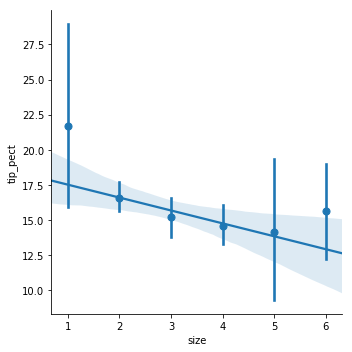

In [19]:
# 平均値の関数を与える
sns.lmplot('size', 'tip_pect', tips, x_estimator=np.mean)

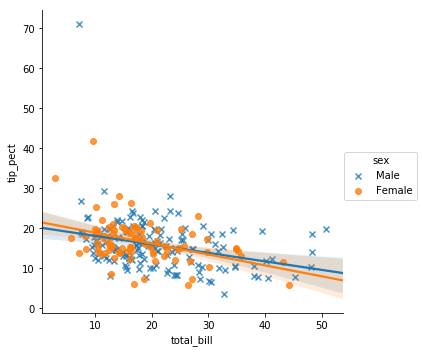

In [22]:
# 男女別
sns.lmplot('total_bill', 'tip_pect', tips, hue='sex', markers=['x', 'o'])

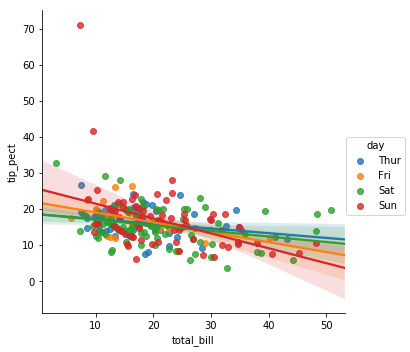

In [23]:
# 曜日ごと
sns.lmplot('total_bill', 'tip_pect', tips, hue='day')

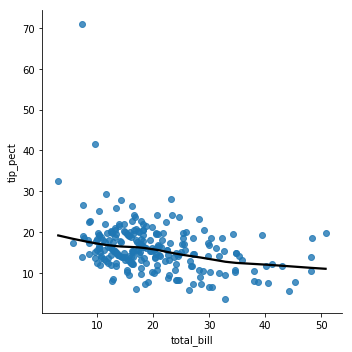

In [24]:
# LOESS
sns.lmplot('total_bill', 'tip_pect', tips, lowess=True, line_kws={'color': 'black'})

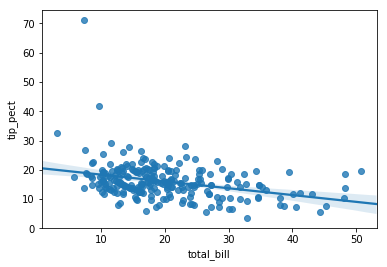

In [25]:
sns.regplot('total_bill', 'tip_pect', tips)

AttributeError: 'Figure' object has no attribute 'scatter'

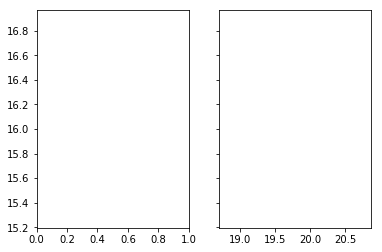

In [31]:
fig,(axis1, axis2) = plt.subplots(1, 2, sharey=True)
sns.regplot('total_bill', 'tip_pect', tips, ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips.sort_values('size'), ax=axis2)